In [1]:
pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1MB 2.7MB/s 


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

In [3]:
# Image
img_path = tf.keras.utils.get_file('tensorflow.png','https://tensorflow.org/images/tf_logo.png')

40960/39781 [==============================] - 0s 3us/step


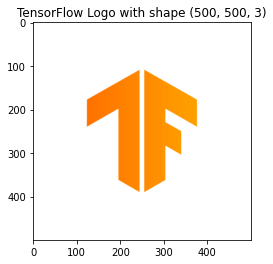

In [4]:
# Display Image
img_raw = tf.io.read_file(img_path)
img = tf.io.decode_image(img_raw)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, [500,500])

plt.title("TensorFlow Logo with shape {}".format(img.shape))
_ = plt.imshow(img)

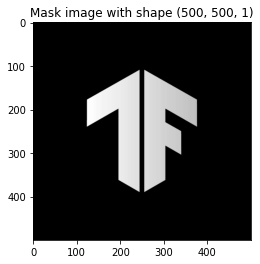

In [5]:
# RGB to Greyscale

bw_img = 1.0 - tf.image.rgb_to_grayscale(img)

plt.title("Mask image with shape {}".format(bw_img.shape))
_ = plt.imshow(bw_img[...,0], cmap = 'gray')

### Mean filtering

Mean filtering is a filtering technique, which is often used to remove noise from an image or signal. The idea is to run through the image pixel by pixel and replacing it with the average values of neighboring pixels.

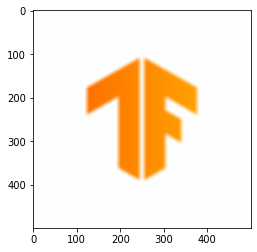

In [6]:
mean = tfa.image.mean_filter2d(img, filter_shape = 11)
_ = plt.imshow(mean)

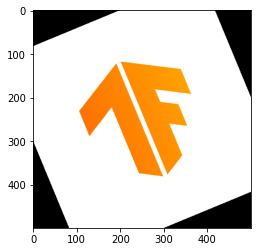

In [7]:
# Rotate

rotate = tfa.image.rotate(img, tf.constant(np.pi/8))
_ = plt.imshow(rotate)

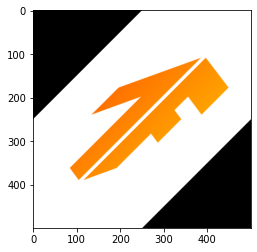

In [8]:
# Transform
# This operation transforms the given image on the basis of the transform vector given by the user.

transform = tfa.image.transform(img, [1.0, 1.0, -250, 0.0, 1.0, 0.0, 0.0, 0.0])
_ = plt.imshow(transform)

### Random HSV in YIQ

This operation changes color scale of a given RGB image to YIQ but here delta hue and saturation values are picked randomly from the given range.

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/utils/resource_loader.py:103: UserWarning: You are currently using TensorFlow 2.3.0 and trying to load a custom op (custom_ops/image/_distort_image_ops.so).
TensorFlow Addons has compiled its custom ops against TensorFlow 2.2.0, and there are no compatibility guarantees between the two versions. 
This means that you might get segfaults when loading the custom op, or other kind of low-level errors.
 If you do, do not file an issue on Github. This is a known limitation.

It might help you to fallback to pure Python ops with TF_ADDONS_PY_OPS . To do that, see https://github.com/tensorflow/addons#gpucpu-custom-ops 

You can also change the TensorFlow version installed on your system. You would need a TensorFlow version equal to or above 2.2.0 and strictly below 2.3.0.
 Note that nightly versions of TensorFlow, as well as non-pip TensorFlow like `conda install tensorflow` or compiled from source are not supported.

The last solution i

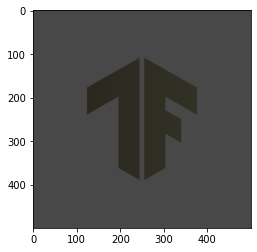

In [9]:
delta = 0.5
lower_saturation = 0.1
upper_saturation = 0.9
lower_value = 0.2
upper_value = 0.8
rand_hsvinyiq = tfa.image.random_hsv_in_yiq(img, delta, lower_saturation, upper_saturation, lower_value, upper_value)
_ = plt.imshow(rand_hsvinyiq)

### Adjust HSV in YIQ

This operation changes color scale of a given RGB image to YIQ but here instead of choosing randomly, delta hue and saturation values are inputs form the user.

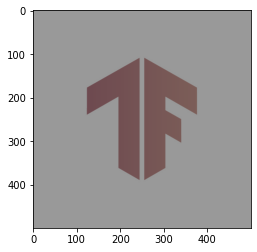

In [10]:
delta = 0.5
saturation = 0.3
value = 0.6
adj_hsvinyiq = tfa.image.adjust_hsv_in_yiq(img, delta, saturation, value)
_ = plt.imshow(adj_hsvinyiq)